In [2]:
import sys
sys.path.append(r"C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages")
import cv2

In [3]:
import numpy as np
print("Numpy imported successfully")
import matplotlib.pyplot as plt
print("MatplotLib imported successfully")
import cv2
print("CV2 imported successfully")
import os
print("OS imported successfully")
import random
print("Random imported successfully")
import pickle
print("Pickle imported successfully")
import pandas as pd
print("Pandas imported successfully")
from tensorflow import keras
print("Tensorflow Keras imported successfully")
from tensorflow.keras.models import Sequential
print("Tensorflow Sequential imported successfully")
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
print("Tensorflow Dense Dropout Flattern Conv2D MaxPooling2D imported successfully")
from tensorflow.keras.optimizers import Adam
print("Tensorflow Adam imported successfully")
from tensorflow.keras.utils import to_categorical
print("Tensorflow to_categorical imported successfully")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("Tensorflow ImageDataGenerator imported successfully")
from sklearn.model_selection import train_test_split
print("Sklearn Train test split imported successfully")

Numpy imported successfully
MatplotLib imported successfully
CV2 imported successfully
OS imported successfully
Random imported successfully
Pickle imported successfully


C:\Users\Admin\AppData\Local\Temp\ipykernel_2388\1773438294.py:13: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Pandas imported successfully

Tensorflow Keras imported successfully
Tensorflow Sequential imported successfully
Tensorflow Dense Dropout Flattern Conv2D MaxPooling2D imported successfully
Tensorflow Adam imported successfully
Tensorflow to_categorical imported successfully
Tensorflow ImageDataGenerator imported successfully
Sklearn Train test split imported successfully


In [11]:
################# Parameters #####################
 
# path = r"C:\Users\Parth\Desktop\Traffic Sign classification\myData" # folder with all the class folders
# path = r"C:\Users\Admin\Desktop\New folder (2)\Traffic Sign classification\myData"   # Actual Dataset
path = r"C:\Users\Admin\Desktop\New folder (2)\1\Train_Sample"  # Sample Dataset
# labelFile = r'C:\Users\Parth\Desktop\Traffic Sign classification\labels.csv' # file with all names of classes
# labelFile = r"C:\Users\Admin\Desktop\New folder (2)\Traffic Sign classification\labels.csv"   # Actual 2
labelFile = r"C:\Users\Admin\Desktop\New folder (2)\1\labels.csv"    # sAMPLE
batch_size_val=16  # how many to process together
steps_per_epoch_val=126
epochs_val=50
imageDimesions = (32,32,3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation
###################################################

In [5]:
import os
path = r"C:\Users\Admin\Desktop\New folder (2)\1\Train_Sample"
# path = r"C:\Users\Admin\Desktop\New folder (2)\Traffic Sign classification\Train_Sample"  # Ensure this folder exists and is correctly set
if not os.path.exists(path):
    raise ValueError(f"Path '{path}' does not exist. Check the folder name.")

myList = os.listdir(path)  # Get all class folders inside 'Train'
print("Total Classes Detected:", len(myList))


Total Classes Detected: 5


In [6]:
import os
import numpy as np
count = 0 
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")

for x in range(len(myList)):
    myPicList = os.listdir(os.path.join(path, str(count)))
    for y in myPicList:
        curImg = cv2.imread(os.path.join(path, str(count), y))
        if curImg is not None:  # ✅ Only add valid images
            images.append(curImg)
            classNo.append(count)
        else:
            print(f"Skipping invalid image: {y} in class {count}")
    print(count, end=" ")
    count += 1

print(" ")
images = np.array(images, dtype=object)  # ✅ Prevents shape errors
classNo = np.array(classNo)


Total Classes Detected: 5
Importing Classes.....
0 1 2 3 4  


In [7]:
images = []  # ✅ Keep this as a list until all images are collected
classNo = []

for x in range(len(myList)):
    myPicList = os.listdir(os.path.join(path, myList[x]))
    for y in myPicList:
        curImg = cv2.imread(os.path.join(path, myList[x], y))
        if curImg is not None:
            curImg = cv2.resize(curImg, (32, 32))  # ✅ Resize to match model expectations
            images.append(curImg)  # ✅ Append to the list (not NumPy array yet)
            classNo.append(x)  # ✅ Assign correct class index
    print(x, end=" ")

# ✅ Convert list to NumPy array AFTER collecting all images
images = np.array(images)
classNo = np.array(classNo)

print("\nImage dataset prepared successfully!")
print("Images shape:", images.shape)  # Should be (total_images, 32, 32, 3)
print("Labels shape:", classNo.shape)  # Should match total_images


0 1 2 3 4 
Image dataset prepared successfully!
Images shape: (3150, 32, 32, 3)
Labels shape: (3150,)


In [8]:
from sklearn.model_selection import train_test_split
############################### Split Data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
 
# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID 

In [9]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_validation = np.array(X_validation)
y_validation = np.array(y_validation)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [10]:
############################### TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

Data Shapes
Train(2016, 32, 32, 3) (2016,)
Validation(504, 32, 32, 3) (504,)
Test(630, 32, 32, 3) (630,)


In [12]:
############################### READ CSV FILE
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (5, 2) <class 'pandas.core.frame.DataFrame'>


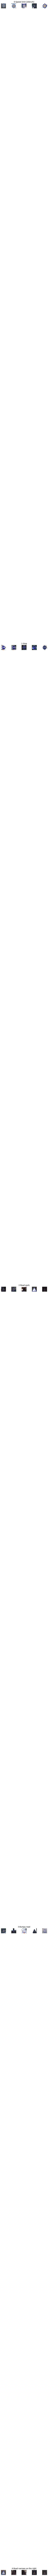

In [13]:
############################### DISPLAY SOME SAMPLES IMAGES  OF ALL THE CLASSES
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

[85, 55, 83, 51, 73, 85]


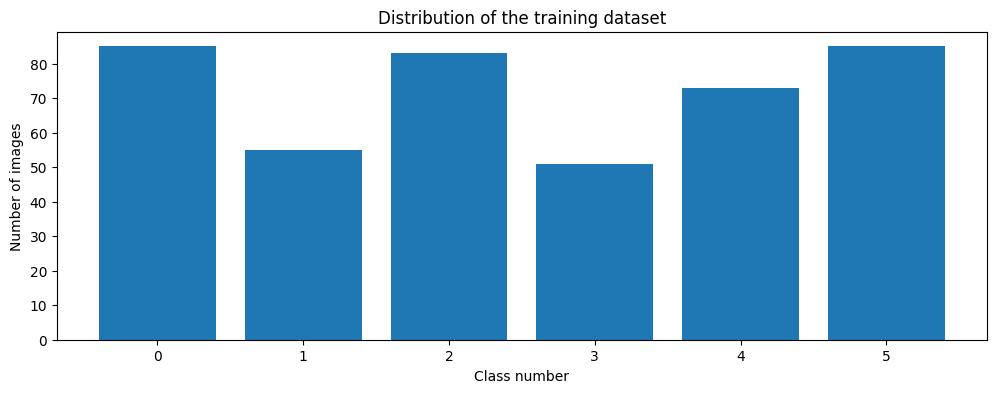

In [11]:
############################### DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [14]:
############################### PREPROCESSING THE IMAGES
 
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img
 
X_train=np.array(list(map(preprocessing,X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
# cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)]) # TO CHECK IF THE TRAINING IS DONE PROPERLY

In [15]:
############################### ADD A DEPTH OF 1
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

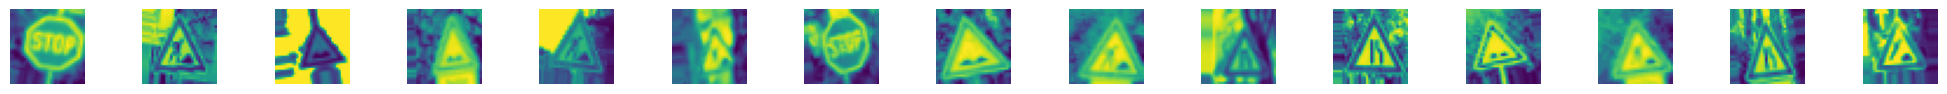

In [16]:
############################### AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)
 
# TO SHOW AGMENTED IMAGE SAMPLES
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()
 
 
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

In [17]:
############################### CONVOLUTION NEURAL NETWORK MODEL
def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5) # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
                         # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 500   # NO. OF NODES IN HIDDEN LAYERS
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool)) # DOES NOT EFFECT THE DEPTH/NO OF FILTERS
 
    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5)) # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(Dense(noOfClasses,activation='softmax')) # OUTPUT LAYER
    # COMPILE MODEL
    # model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
model = myModel()
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                 

In [19]:
############################### TRAIN

history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),
                  steps_per_epoch=steps_per_epoch_val,
                  epochs=epochs_val,
                  validation_data=(X_validation,y_validation),
                  shuffle=True)

Epoch 1/50


126/126 [==============================] - 57s 430ms/step - loss: 1.2843 - accuracy: 0.5258 - val_loss: 0.5956 - val_accuracy: 0.7540
Epoch 2/50
126/126 [==============================] - 61s 486ms/step - loss: 0.5491 - accuracy: 0.7932 - val_loss: 0.0903 - val_accuracy: 0.9722
Epoch 3/50
126/126 [==============================] - 55s 439ms/step - loss: 0.3148 - accuracy: 0.8854 - val_loss: 0.0466 - val_accuracy: 0.9841
Epoch 4/50
126/126 [==============================] - 59s 465ms/step - loss: 0.2436 - accuracy: 0.9127 - val_loss: 0.0245 - val_accuracy: 0.9921
Epoch 5/50
126/126 [==============================] - 57s 448ms/step - loss: 0.1383 - accuracy: 0.9549 - val_loss: 0.0140 - val_accuracy: 0.9960
Epoch 6/50
126/126 [==============================] - 57s 451ms/step - loss: 0.1102 - accuracy: 0.9603 - val_loss: 0.0080 - val_accuracy: 0.9960
Epoch 7/50
126/126 [==============================] - 57s 454ms/step - loss: 0.0938 - accuracy: 0.9678 - val_loss: 0.0212 - val_

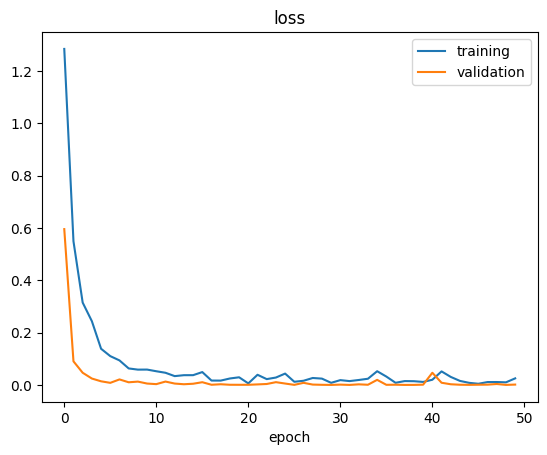

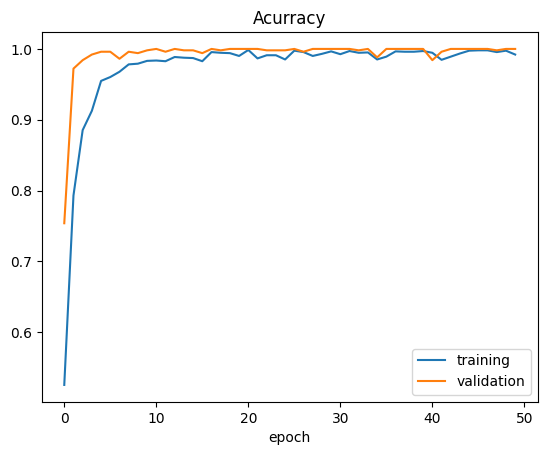

Test Score: 0.010393809527158737
Test Accuracy: 0.9968253970146179


In [20]:
############################### PLOT
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [21]:
# STORE THE MODEL AS A PICKLE OBJECT
pickle_out= open("model_trained.p","wb")  # wb = WRITE BYTE
pickle.dump(model,pickle_out)
pickle_out.close()
print("module saned sucessfully p")
cv2.waitKey(0)

module saned sucessfully p


-1

In [22]:
model.save("model_trained.h5")  # Save in .h5 format
print("module saned sucessfully h5")
model.save("model_trained.keras")  # Save in .h5 format
print("module saned sucessfully keras")

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


module saned sucessfully h5
module saned sucessfully keras


In [23]:
import numpy as np
import cv2
import pickle

In [24]:
#############################################
 
frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX

In [25]:
import cv2

cap = cv2.VideoCapture(0)  # Try 0, 1, or -1 based on your camera index
if not cap.isOpened():
    print("Error: Could not access the camera")
else:
    print("Camera is working!")


Camera is working!


In [26]:
##############################################
 
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

False

In [27]:
for i in range(10):  # Test camera indexes from 0 to 9
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        print(f"Camera found at index {i}")
    else:
        print("Camera not Found")
cap.release()


Camera found at index 0
Camera not Found
Camera not Found
Camera not Found
Camera not Found
Camera not Found
Camera not Found
Camera not Found
Camera not Found
Camera not Found


In [28]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
def getCalssName(classNo):
    if   classNo == 0: return 'Beagle'
    elif classNo == 1: return 'German Shephard'
    elif classNo == 2: return 'Pomerian'
    elif classNo == 3: return 'Lab'

In [32]:
import cv2
import numpy as np
import pickle

import tensorflow as tf

# Load the trained model
# model = tf.keras.models.load_model("model_trained.p")
model = tf.keras.models.load_model("model_trained.h5")

# Define constants
frameWidth = 640
frameHeight = 480
threshold = 0.75  # Adjust as needed
font = cv2.FONT_HERSHEY_SIMPLEX

# Initialize video capture
cap = cv2.VideoCapture(0)  # Change to 0 if needed
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, 150)  # Brightness

# Preprocessing function
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def equalize(img):
    return cv2.equalizeHist(img)

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255.0  # Normalize pixel values
    return img

# Class Name Function
def getClassName(classNo):
    if   classNo == 0: return 'Speed Limit 20'
    elif classNo == 1: return 'Stop'
    elif classNo == 2: return 'Road Work'
    elif classNo == 3: return 'Bumpy Road'
    elif classNo == 4: return 'Road narrows on the right'
    else: return 'Unknown'  # Fallback for safety

while True:
    success, imgOriginal = cap.read()
    if not success:
        print("Failed to read from camera")
        continue  # Skip iteration if no image is read

    # Process image
    img = np.asarray(imgOriginal)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    img = img.reshape(1, 32, 32, 1)

    # Predict image
    predictions = model.predict(img)
    classIndex = np.argmax(predictions)
    probabilityValue = np.max(predictions)

    # Display results
    cv2.putText(imgOriginal, "CLASS: ", (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOriginal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)

    if probabilityValue > threshold:
        className = getClassName(classIndex)  # Get class name

        cv2.putText(imgOriginal, className, (120, 35), font, 0.75, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.putText(imgOriginal, str(round(probabilityValue * 100, 2)) + "%", (180, 75), font, 0.75, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.imshow("Result", imgOriginal)

    # Quit with 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 157ms/step


In [32]:
import cv2
import numpy as np

img = np.zeros((480, 640, 3), dtype=np.uint8)  # Create a black image
cv2.imshow("Test Window", img)
cv2.waitKey(0)  # Wait indefinitely until a key is pressed
cv2.destroyAllWindows()


In [1]:
import numpy as np
import cv2
import pickle

# Camera settings
frameWidth = 640  
frameHeight = 480  
brightness = 180  
threshold = 0.75  
font = cv2.FONT_HERSHEY_SIMPLEX  

# Setup camera
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

# Load trained model
import tensorflow as tf

# Load the trained model
# model = tf.keras.models.load_model("model_trained.p")
model = tf.keras.models.load_model("model_trained.h5")

# Preprocessing functions
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def equalize(img):
    return cv2.equalizeHist(img)

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255.0  # Normalize pixel values
    return img

# Get class name from index
def getClassName(classNo):
    class_dict = {
        0: 'Speed Limit 20 km/h',
        1: 'Stop',
        2: 'Work in Progress',
        3: 'Speed Breaker',
        4: 'Narrow Road Ahead'
    }
    return class_dict.get(classNo, 'Unknown')

while True:
    # Read frame from camera
    success, imgOriginal = cap.read()
    if not success:
        print("Camera Error: Unable to read frame.")
        continue  

    # Process Image
    img = cv2.resize(imgOriginal, (32, 32))
    img = preprocessing(img)
    
    # Show processed image (debugging)
    cv2.imshow("Processed Image", img)

    # Reshape image for prediction
    img = img.reshape(1, 32, 32, 1)

    # Predict class and probability
    predictions = model.predict(img)
    classIndex = np.argmax(predictions)  # FIXED ERROR
    probabilityValue = np.max(predictions)  # Maximum probability

    # Display text on screen
    cv2.putText(imgOriginal, "CLASS:", (20, 50), font, 1, (0, 255, 0), 3, cv2.LINE_AA)
    cv2.putText(imgOriginal, "PROBABILITY:", (20, 100), font, 1, (0, 255, 0), 3, cv2.LINE_AA)

    if probabilityValue > threshold:
        className = getClassName(classIndex)
        cv2.putText(imgOriginal, f"{classIndex} - {className}", (150, 50), font, 1, (0, 0, 255), 3, cv2.LINE_AA)
        cv2.putText(imgOriginal, f"{round(probabilityValue * 100, 2)}%", (250, 100), font, 1, (0, 0, 255), 3, cv2.LINE_AA)

    # Show output window
    cv2.imshow("Result", imgOriginal)

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━